In [ ]:
from google.colab import files

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
#print("TensorFlow version:", tf.__version__)
#print("Available GPUs:", tf.config.list_physical_devices('GPU'))

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#print(tf.__version__)

In [ ]:
from google.colab import files
# Upload training dataset
print("Upload Google_Stock_Price_Train.csv")
train_file = files.upload()


Upload Google_Stock_Price_Train.csv


Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [ ]:
# Upload test dataset
print("Upload Google_Stock_Price_Test.csv")
test_file = files.upload()

Upload Google_Stock_Price_Test.csv


Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [ ]:
training_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [ ]:
#training_data.head()

In [ ]:
#training_data.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [ ]:
#training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
# Extract the 'Open' column as the feature for training
training_set = training_data.iloc[:,1:2].values # Selecting 'Open' price

In [ ]:
training_set.shape, training_data.shape

((1258, 1), (1258, 6))

In [ ]:
# Feature Scaling
# Use MinMaxScaler to normalize the data within the range [0, 1]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
# Generate input sequences (x_train) and target values (y_train) using past 60 days of data
x_train = []
y_train = []
for i in range(60,1258):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

# Convert lists to NumPy arrays for model compatibility
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [ ]:
x_train.shape #, y_train.shape

(1198, 60)

In [ ]:
# reshaping dataset
x_train = x_train.reshape(1198, 60, 1)

In [ ]:
x_train.shape

(1198, 60, 1)

In [ ]:
# object defining
model = tf.keras.models.Sequential()

In [ ]:
# First LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# Fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
#model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 60, 60)              │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 60)              │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=250)

Epoch 1/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - loss: 0.1297
Epoch 2/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0071
Epoch 3/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0067
Epoch 4/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0063
Epoch 5/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0058
Epoch 6/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0051
Epoch 7/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0054
Epoch 8/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0042
Epoch 9/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0045
Epoch 10/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0038
Epoch 11/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0040
Epoch 12/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0053
Epoch 13/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046
Epoch 14/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0059
Epoch 15/250
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step -

In [ ]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
test_data.shape

(20, 6)

In [ ]:
#test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [ ]:
real_stock_price = test_data.iloc[:, 1:2].values

In [ ]:
real_stock_price.shape

(20, 1)

In [ ]:
# Concatation
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis=0)

# Last 60 days as features
inputs = dataset_total[len(dataset_total)-len(test_data)-60:].values

# numpy array reshaping
inputs = inputs.reshape(-1,1)

# feature scaling
inputs = sc.transform(inputs)

# test set creation
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])

# numpy array coversion
x_test = np.array(x_test)

# reshaping
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predicted stock price
predicted_stock_price = model.predict(x_test)

# inverse scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate MSE
mse = mean_squared_error(real_stock_price, predicted_stock_price)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(real_stock_price, predicted_stock_price)

# Print the performance metrics
print("Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Performance Metrics:
Mean Squared Error (MSE): 1170.6412
Root Mean Squared Error (RMSE): 34.2146
Mean Absolute Error (MAE): 32.7714


In [ ]:
print(predicted_stock_price[19]), print(real_stock_price[19])

[784.89996]
[796.86]


(None, None)

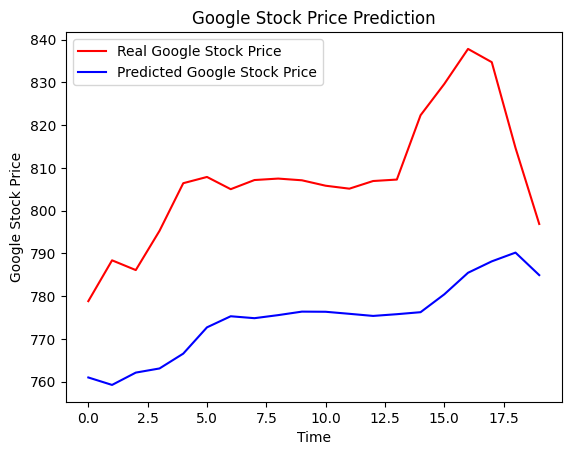

In [ ]:
# visualization
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()